In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [ ]:
!pip install PyWavelets==0.5.2

In [4]:
!pip install opencv-python==3.4.3.18

ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.3.18 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62)
ERROR: No matching distribution found for opencv-python==3.4.3.18


In [5]:
!pip install seaborn==0.8.1

In [6]:
img = cv2.imread('C:/Data_Science/Sportsperson_Classifier/Model/test_images/sachin1.webp')

In [7]:
img.shape

(659, 444, 3)

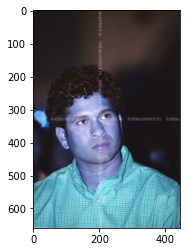

In [8]:
plt.imshow(img)

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(659, 444)

In [10]:
gray

array([[ 21,  22,  24, ...,  36,  34,  28],
       [ 21,  22,  24, ...,  36,  34,  28],
       [ 21,  22,  24, ...,  36,  34,  28],
       ...,
       [168, 175, 174, ..., 151, 152, 150],
       [177, 173, 171, ..., 142, 145, 140],
       [247, 245, 249, ..., 153, 161, 148]], dtype=uint8)

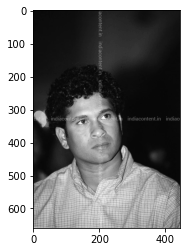

In [11]:
plt.imshow(gray, cmap='gray')


In [12]:
face_cascade = cv2.CascadeClassifier('C:/Data_Science/Sportsperson_Classifier/Model/OpenCV/haarcascade_frontalface_default.xml')

In [13]:
eye_cascade = cv2.CascadeClassifier("C:/Data_Science/Sportsperson_Classifier/Model/OpenCV/haarcascade_eye.xml")


In [14]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 93, 265, 176, 176]])

In [15]:
face_cascade

<CascadeClassifier 00000298F1123710>

In [16]:
eye_cascade

<CascadeClassifier 00000298F1123490>

In [17]:
(x,y,w,h) = faces[0]
x,y,w,h

(93, 265, 176, 176)

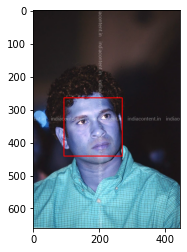

In [18]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

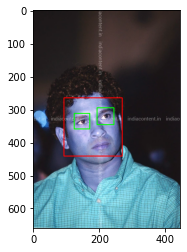

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

(2) Preprocessing: Crop the facial region of the image


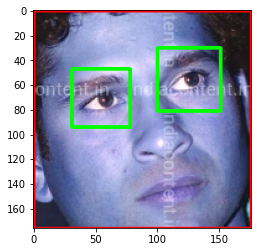

In [20]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [21]:
cropped_img = np.array(roi_color)
cropped_img.shape

(176, 176, 3)

### (3) Preprocessing: Use wavelet transform as a feature for traning our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
Wavelet transform

In [22]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

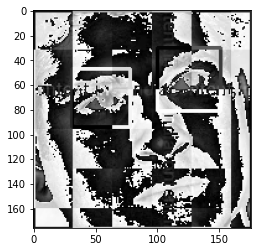

In [23]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier
#### (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [24]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

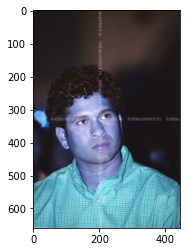

In [25]:
original_image = cv2.imread('C:/Data_Science/Sportsperson_Classifier/Model/test_images/sachin1.webp')
plt.imshow(original_image)

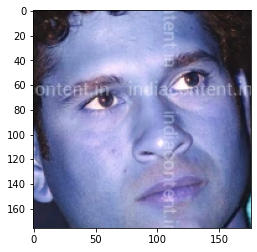

In [26]:
cropped_image = get_cropped_image_if_2_eyes('C:/Data_Science/Sportsperson_Classifier/Model/test_images/sachin1.webp')
plt.imshow(cropped_image)

###### In below image face is not very clear and it doesn't have two eyes clearly visible



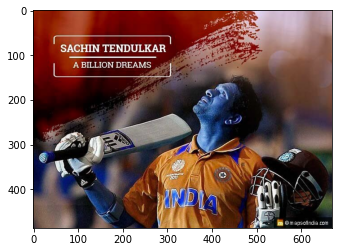

In [27]:
org_image_obstructed = cv2.imread("C:/Data_Science/Sportsperson_Classifier/Model/test_images/Tendulkar.jpg")
plt.imshow(org_image_obstructed)

In [28]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Data_Science/Sportsperson_Classifier/Model/test_images/Tendulkar.jpg')
cropped_image_no_2_eyes

In [29]:
path_to_data = "C:/Data_Science/Sportsperson_Classifier/Model/Datasets/"
path_to_cr_data = "C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/"

In [30]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [31]:
img_dirs

['C:/Data_Science/Sportsperson_Classifier/Model/Datasets/sachin_tendulkar',
 'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/virat_kohli']

###### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [32]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

sachin_tendulkar
virat_kohli


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


The below is the dictionary of files which we cropped.

In [40]:
celebrity_file_names_dict


{'sachin_tendulkar': ['C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar1.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar2.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar3.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar4.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar5.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar6.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar7.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar8.png',
  'C:/Data_Science/Sportsperson_Classifier/Model/Datasets/cropped/sachin_tendulkar/sachin_tendulkar9.png',
  'C:/Data_Scienc

Here we are writing two for loops. One is for the each folder and the other one is for each file in that folder. Vertically stacking the cropped image and Wavelet transformed image. Using the Numpy Vertical stack function

In [41]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'sachin_tendulkar': 0, 'virat_kohli': 1}

As the Machine Learning model understands only numbers we have to assign some random numbers to each image using the above code.

#### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [43]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


#### The error happenning apparently because as we deleted few images manually. To remove that we can write below code after declaring the img. 
if img is None:
            Continue

In [47]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img  is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [48]:
len(X)

63

In [49]:
len(X[0])

4096

len(X[0]) means 32*32*3 + 32*32

In [51]:
32*32*3 + 32*32

4096

In [50]:
X[0]

array([[246],
       [220],
       [203],
       ...,
       [244],
       [239],
       [ 14]], dtype=uint8)

In [52]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(63, 4096)

## Data cleaning process is done. Now we are ready to train our model


In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.875

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.80      0.89        10

    accuracy                           0.88        16
   macro avg       0.88      0.90      0.87        16
weighted avg       0.91      0.88      0.88        16



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

In [59]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.960000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.935556,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.980000,{'logisticregression__C': 1}


In [60]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(X_test,y_test)

0.9375

In [64]:
best_estimators['random_forest'].score(X_test,y_test)

0.75

In [65]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9375

In [66]:
best_clf = best_estimators['logistic_regression']

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0],
       [1, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

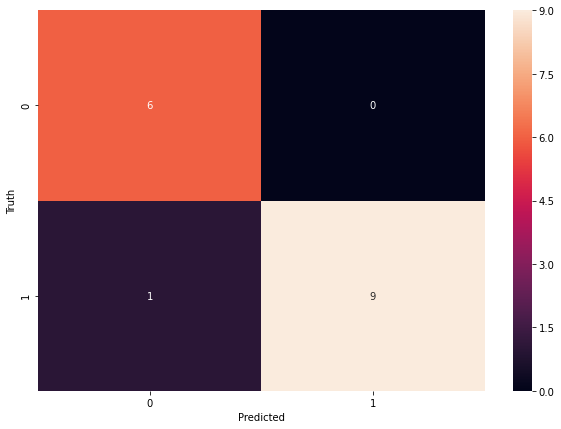

In [68]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
class_dict

{'sachin_tendulkar': 0, 'virat_kohli': 1}

### It's time to save the model

In [70]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Saving the class dictionary as well as we need this in future for flask server.

In [72]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))